In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import plotly.express as pex

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('/content/drive/MyDrive/Hackathon_Pythonicos/bd') ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Hackathon_Pythonicos/bd'

In [ ]:
from google.colab import drive
import pandas as pd

# Cargar el archivo
modelo = pd.read_csv('bd_sinColDummy.csv')
print(modelo.shape)
modelo.head()


(560, 10)


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,vector_camaras,vector_display,vector_network
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0]"
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1]"


modelo = pd.read_csv('bd_sinColDummy.csv')
print(modelo.shape)
modelo.head()# Lectura de datos

In [ ]:
import ast  # Add this import at the top

def expand_vector(modelo, col_base, prefix):
    """
    Convierte la columna con strings de listas en columnas binarias separadas.
    - col_base: nombre de la columna (ej. 'vector_camaras')
    - prefix  : prefijo para las nuevas columnas (ej. 'cam')
    """
    # 1) Garantizar lista: si el elemento ya es list, lo deja; si es string, lo evalúa
    def to_list(x):
        if isinstance(x, list):
            return x
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []          # si viene vacío o malformado

    modelo[col_base] = modelo[col_base].apply(to_list)

    # 2) Crear DataFrame con columnas expandidas
    ancho = len(modelo[col_base].iloc[0])           # asume mismo largo en todas las filas
    nuevas = pd.DataFrame(modelo[col_base].tolist(),
                          columns=[f'{prefix}_{i}' for i in range(ancho)],
                          index=modelo.index)  # Changed df.index to modelo.index

    # 3) Concatenar y eliminar la original
    resultado = pd.concat([modelo.drop(columns=[col_base]), nuevas], axis=1)  # Changed df to modelo
    return resultado

# Uso - usando la variable 'modelo' que ya existe
modelo_expandido = expand_vector(modelo, 'vector_camaras',  'cam')
modelo_expandido = expand_vector(modelo_expandido, 'vector_display',  'disp')
modelo_expandido = expand_vector(modelo_expandido, 'vector_network',  'net')

print("Columnas totales:", modelo_expandido.shape[1])
modelo_expandido.head()

Columnas totales: 48


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_6,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,0,1,1,1,0,1


In [ ]:
# Cálculos dinámicos a partir de tus datos reales
precio_promedio = modelo_expandido['price'].mean()
ram_promedio = modelo_expandido['storage_ram(GB)'].mean()
almacenamiento_promedio = modelo_expandido['internal_storage(GB)'].mean()
bateria_promedio = modelo_expandido['battery'].mean()

print(f"Precio promedio: {precio_promedio}")
print(f"RAM promedio: {ram_promedio}")
print(f"Almacenamiento promedio: {almacenamiento_promedio}")
print(f"Batería promedio: {bateria_promedio}")


Precio promedio: 257.4084107142857
RAM promedio: 6.139285714285714
Almacenamiento promedio: 125.14821428571429
Batería promedio: 4614.375


In [ ]:
umbrales = {
    'precio_medio': modelo_expandido['price'].mean(),
    'precio_alto': modelo_expandido['price'].quantile(0.50),  # Puedes ajustar

    'ram_media': modelo_expandido['storage_ram(GB)'].mean(),
    'ram_alta': modelo_expandido['storage_ram(GB)'].quantile(0.75),

    'almacenamiento_medio': modelo_expandido['internal_storage(GB)'].mean(),
    'almacenamiento_alto': modelo_expandido['internal_storage(GB)'].quantile(0.75),

    'bateria_media': modelo_expandido['battery'].mean(),
    'bateria_alta': modelo_expandido['battery'].quantile(0.75),
}


In [ ]:
def score_categoria_dinamica(row, umbrales):
    score = 0

    # Precio
    if row['price'] > umbrales['precio_alto']:
        score += 3
    elif row['price'] > umbrales['precio_medio']:
        score += 2
    else:
        score += 1

    # RAM
    if row['storage_ram(GB)'] >= umbrales['ram_alta']:
        score += 3
    elif row['storage_ram(GB)'] >= umbrales['ram_media']:
        score += 2
    else:
        score += 1

    # Almacenamiento
    if row['internal_storage(GB)'] >= umbrales['almacenamiento_alto']:
        score += 3
    elif row['internal_storage(GB)'] >= umbrales['almacenamiento_medio']:
        score += 2
    else:
        score += 1

    # Batería
    if row['battery'] >= umbrales['bateria_alta']:
        score += 3
    elif row['battery'] >= umbrales['bateria_media']:
        score += 2
    else:
        score += 1

    if row['expandable_storage(TB)'] > 0:
        score += 1

    score += sum([row[f'cam_{i}'] for i in range(25)])
    score += sum([row[f'disp_{i}'] for i in range(11)])
    score += sum([row[f'net_{i}'] for i in range(5)])

    return score


In [ ]:
modelo_expandido['score'] = modelo_expandido.apply(score_categoria_dinamica, axis=1, umbrales=umbrales)

In [ ]:
modelo_expandido

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_7,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4,score
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,15
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,17
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,17
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,17
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,0,1,1,1,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,194.39,64.0,4.0,0.0,4000.0,0,0,0,...,0,0,0,0,1,1,1,0,0,11
556,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,108.00,32.0,2.0,0.0,3300.0,0,0,0,...,0,0,1,0,1,1,1,0,0,9
557,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",4.2,419.99,128.0,8.0,0.0,4500.0,0,0,0,...,0,0,0,0,1,1,1,1,0,18
558,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,131.99,32.0,3.0,0.0,4000.0,0,0,0,...,0,0,0,0,0,1,0,1,0,10


In [ ]:
# 1. Verifica la distribución de los scores
print(modelo_expandido['score'].describe())


count    560.000000
mean      15.646429
std        3.764060
min        7.000000
25%       13.000000
50%       15.000000
75%       18.250000
max       24.000000
Name: score, dtype: float64


In [ ]:
# Calcular percentiles sobre el score real
p25 = modelo_expandido['score'].quantile(0.25)  # 12
p50= modelo_expandido['score'].quantile(0.50)  # 15
p75 = modelo_expandido['score'].quantile(0.75)  # 18


# Clasificar según score
def clasificar_categoria(score):
    if score >= p75:
        return 'Gama Alta'
    elif score >= p50:
        return 'Gama Media'
    elif score >= p25:
        return 'Gama Media Baja'
    else:
        return 'Gama Baja'


modelo_expandido['categoria'] = modelo_expandido['score'].apply(clasificar_categoria)


In [ ]:
modelo_expandido

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,cam_0,cam_1,cam_2,...,disp_8,disp_9,disp_10,net_0,net_1,net_2,net_3,net_4,score,categoria
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,113.99,64.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,15,Gama Media
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,17,Gama Media
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,17,Gama Media
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,125.99,128.0,4.0,1.0,6000.0,0,0,0,...,0,0,0,1,1,1,0,0,17,Gama Media
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,185.99,128.0,6.0,1.0,5000.0,0,0,0,...,0,0,0,1,1,1,0,1,18,Gama Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,194.39,64.0,4.0,0.0,4000.0,0,0,0,...,0,0,0,1,1,1,0,0,11,Gama Baja
556,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,108.00,32.0,2.0,0.0,3300.0,0,0,0,...,0,1,0,1,1,1,0,0,9,Gama Baja
557,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",4.2,419.99,128.0,8.0,0.0,4500.0,0,0,0,...,0,0,0,1,1,1,1,0,18,Gama Media
558,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,131.99,32.0,3.0,0.0,4000.0,0,0,0,...,0,0,0,0,1,0,1,0,10,Gama Baja


Accuracy: 1.0
                 precision    recall  f1-score   support

      Gama Alta       1.00      1.00      1.00        42
      Gama Baja       1.00      1.00      1.00        38
     Gama Media       1.00      1.00      1.00        56
Gama Media Baja       1.00      1.00      1.00        32

       accuracy                           1.00       168
      macro avg       1.00      1.00      1.00       168
   weighted avg       1.00      1.00      1.00       168



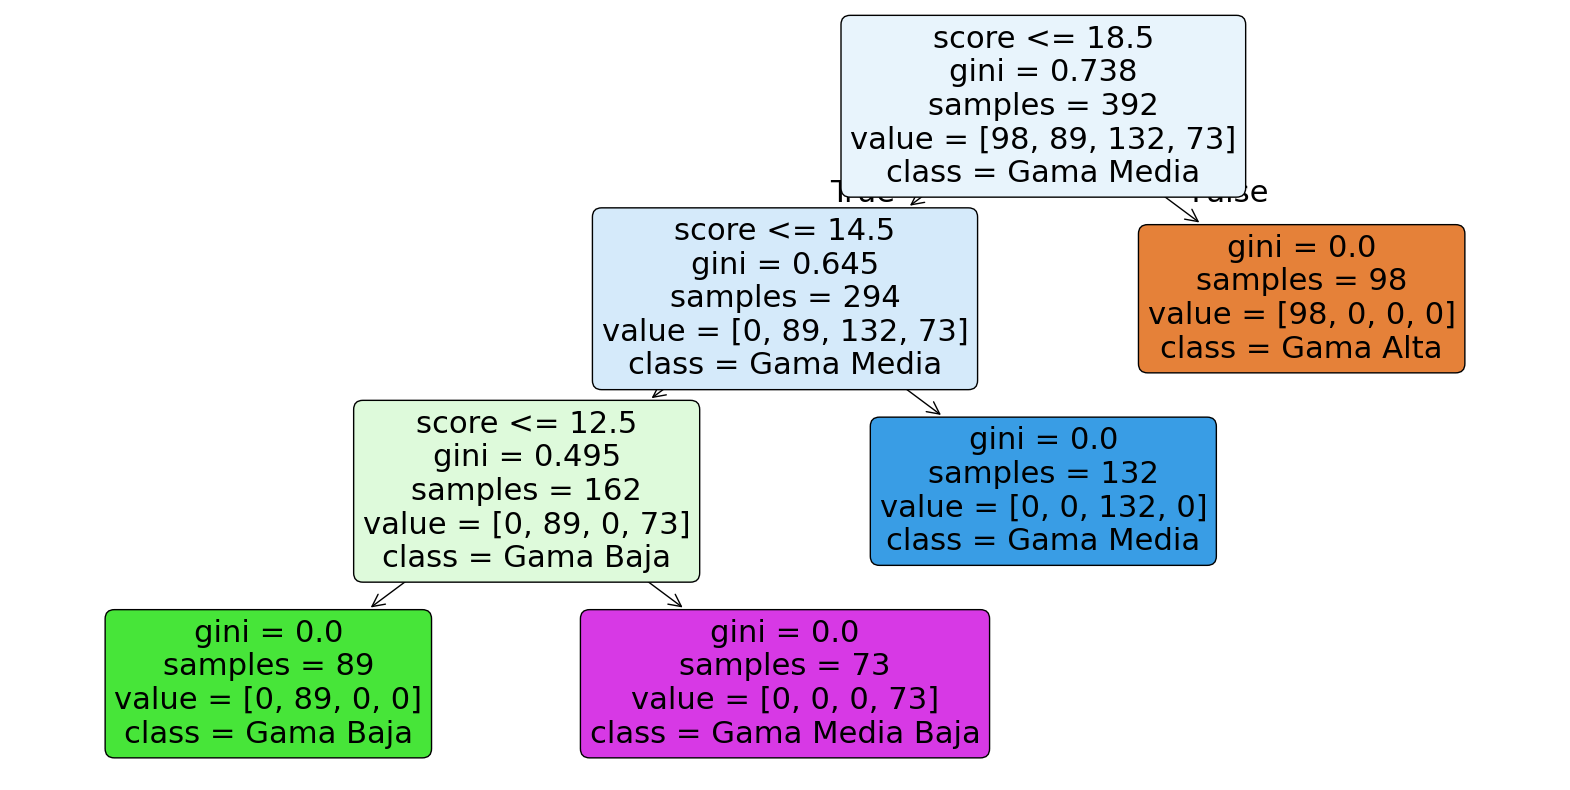

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Definir variables predictoras X y variable objetivo y
# Usamos todas las columnas numéricas excepto 'categoria' y 'name'
X = modelo_expandido.drop(columns=['categoria', 'name', 'price'])
y = modelo_expandido['categoria']

# 2. Dividir en datos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Crear y entrenar el modelo
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth limita la profundidad para evitar sobreajuste
clf.fit(X_train, y_train)

# 4. Predecir con el modelo
y_pred = clf.predict(X_test)

# 5. Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()


In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy CV promedio:", scores.mean())


Accuracy CV promedio: 1.0


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# Asumiendo que tienes el DataFrame 'modelo_expandido' con la columna 'categoria' que es tu target

# Preparar datos (X e y)
X = modelo_expandido.drop(columns=['categoria', 'name','price'])  # 'name' lo excluimos porque no es numérico
y = modelo_expandido['categoria']

# Crear el clasificador árbol con profundidad limitada para evitar sobreajuste
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Definir validación cruzada estratificada (mantiene proporciones de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular accuracy promedio con validación cruzada
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f'Accuracy promedio CV: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')

# Entrenar y evaluar con un split manual para mostrar reporte de clasificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Reporte de clasificación en test set:")
print(classification_report(y_test, y_pred))


Accuracy promedio CV: 1.0000 (+/- 0.0000)
Reporte de clasificación en test set:
                 precision    recall  f1-score   support

      Gama Alta       1.00      1.00      1.00        42
      Gama Baja       1.00      1.00      1.00        38
     Gama Media       1.00      1.00      1.00        56
Gama Media Baja       1.00      1.00      1.00        32

       accuracy                           1.00       168
      macro avg       1.00      1.00      1.00       168
   weighted avg       1.00      1.00      1.00       168



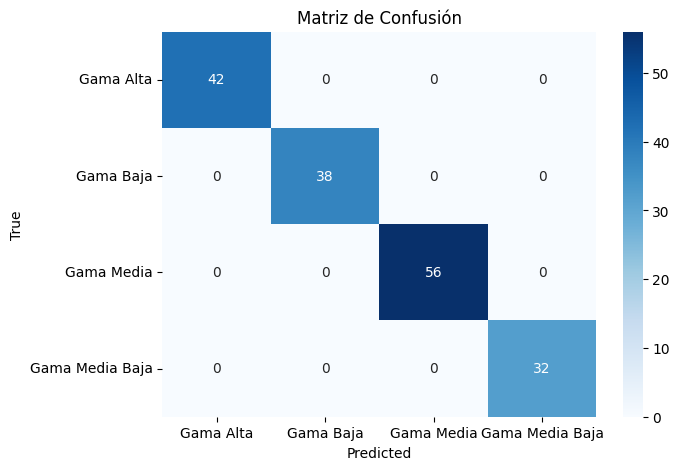

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

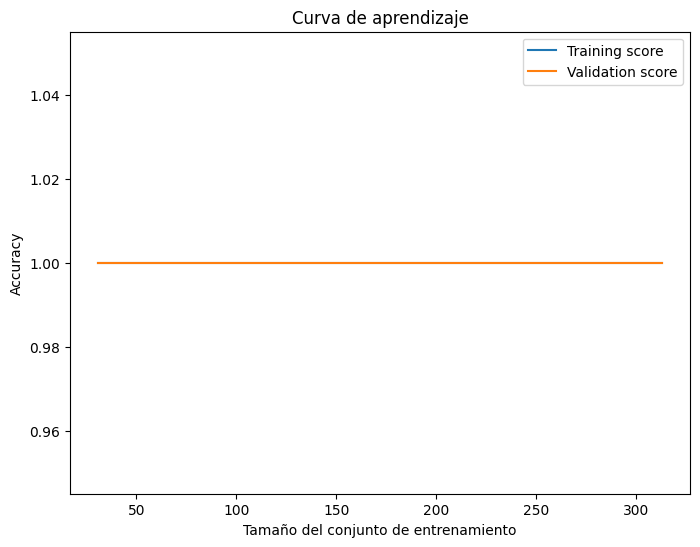

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train,
                                                        cv=5,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        random_state=42)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()


<ipython-input-766-b9e8a0ae211f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='importance', y='feature', palette='viridis')


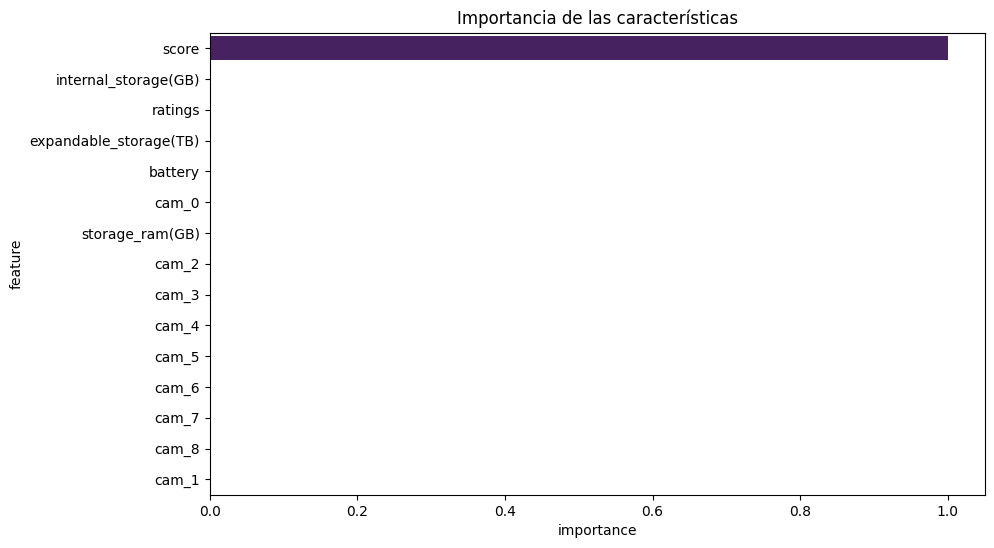

In [ ]:
import pandas as pd

importances = clf.feature_importances_
features = X_train.columns

df_importance = pd.DataFrame({'feature': features, 'importance': importances})
df_importance = df_importance.sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=df_importance, x='importance', y='feature', palette='viridis')
plt.title('Importancia de las características')
plt.show()


In [ ]:
cel_nuevo=pd.read_csv('smartphone_clean-3.csv')
cel_nuevo.head()

,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,vector_camaras,vector_display,vector_network
0,NaN,NaN,NaN,256,8,1.0,5000,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1]"
1,NaN,NaN,NaN,64,8,0.0,6000,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1]"
2,NaN,NaN,NaN,100,12,1.0,4400,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1]"


In [ ]:
def predecir_categoria(cel_nuevo, clf, X_clf_columns):
    import ast

    # Convertir strings a listas
    for col in ['vector_camaras', 'vector_display', 'vector_network']:
        cel_nuevo[col] = cel_nuevo[col].fillna('[]')
        cel_nuevo[col] = cel_nuevo[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Crear DataFrames con el número correcto de columnas
    df_cam = pd.DataFrame(cel_nuevo['vector_camaras'].tolist(), columns=[f'cam_{i}' for i in range(25)])
    df_disp = pd.DataFrame(cel_nuevo['vector_display'].tolist(), columns=[f'disp_{i}' for i in range(11)])
    df_net = pd.DataFrame(cel_nuevo['vector_network'].tolist(), columns=[f'net_{i}' for i in range(5)])

    # Concatenar columnas numéricas y vectores expandidos
    df_features = pd.concat([
        cel_nuevo[['internal_storage(GB)', 'storage_ram(GB)', 'expandable_storage(TB)', 'battery']],
        df_cam, df_disp, df_net
    ], axis=1)

    # Verificar que todas las columnas necesarias están presentes
    missing_cols = set(X_clf_columns) - set(df_features.columns)
    if missing_cols:
        raise ValueError(f"Faltan columnas para la predicción: {missing_cols}")

    # Ordenar columnas para el modelo
    df_features = df_features[X_clf_columns]

    # Predecir categoría
    categoria_predicha = clf.predict(df_features)

    resultados = cel_nuevo.copy()
    resultados['categoria_predicha'] = categoria_predicha

    return resultados


In [ ]:
print(resultados[['internal_storage(GB)', 'storage_ram(GB)', 'battery', 'categoria_predicha', 'precio_predicho']])


   internal_storage(GB)  storage_ram(GB)  battery categoria_predicha  \
0                   256                8     5000         Gama Media   
1                    64                8     6000         Gama Media   
2                   100               12     4400         Gama Media   

   precio_predicho  
0       292.557379  
1       430.713631  
2       166.204078  


In [ ]:
print(modelo_expandido['price'].describe())
print(cel_nuevo[['internal_storage(GB)', 'storage_ram(GB)', 'battery']])


count    560.000000
mean     257.408411
std      190.414946
min       13.800000
25%      146.220000
50%      203.990000
75%      311.990000
max      996.000000
Name: price, dtype: float64
   internal_storage(GB)  storage_ram(GB)  battery
0                   256                8     5000
1                    64                8     6000
2                   100               12     4400


In [ ]:
print(modelo_expandido['price'].describe())
print(resultados[['internal_storage(GB)', 'storage_ram(GB)', 'battery', 'categoria_predicha', 'precio_predicho']])

count    560.000000
mean     257.408411
std      190.414946
min       13.800000
25%      146.220000
50%      203.990000
75%      311.990000
max      996.000000
Name: price, dtype: float64
   internal_storage(GB)  storage_ram(GB)  battery categoria_predicha  \
0                   256                8     5000         Gama Media   
1                    64                8     6000         Gama Media   
2                   100               12     4400         Gama Media   

   precio_predicho  
0       292.557379  
1       430.713631  
2       166.204078  


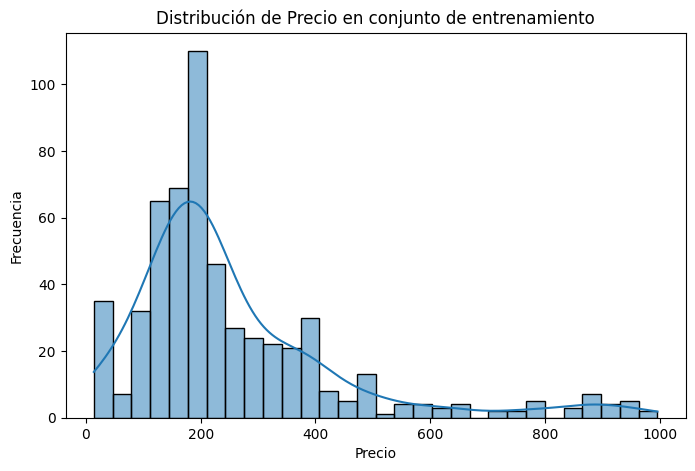

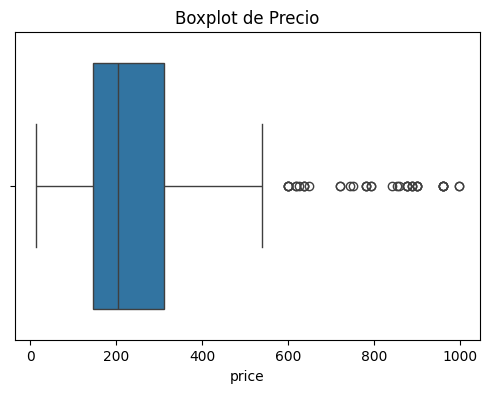

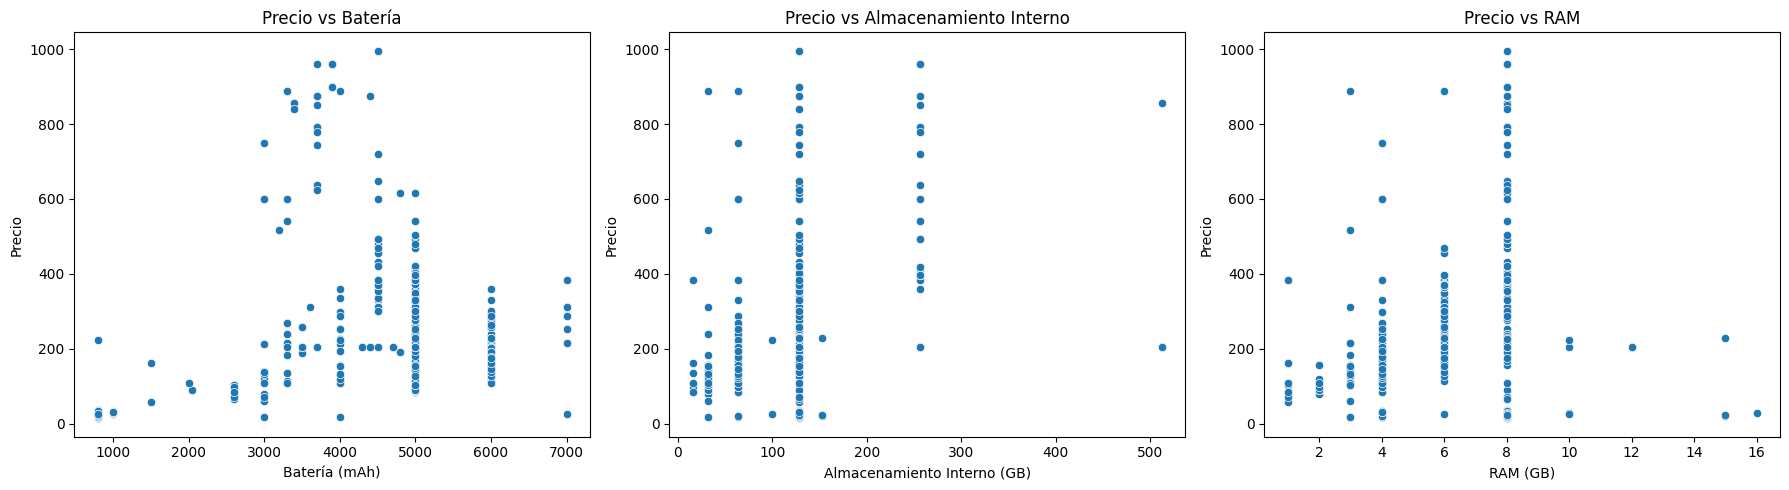

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograma del precio en el conjunto de entrenamiento
plt.figure(figsize=(8,5))
sns.histplot(modelo_expandido['price'], bins=30, kde=True)
plt.title('Distribución de Precio en conjunto de entrenamiento')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 2. Boxplot para detectar posibles valores extremos en precio
plt.figure(figsize=(6,4))
sns.boxplot(x=modelo_expandido['price'])
plt.title('Boxplot de Precio')
plt.show()

# 3. Scatter plots para ver relación precio vs algunas características

fig, axs = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(x=modelo_expandido['battery'], y=modelo_expandido['price'], ax=axs[0])
axs[0].set_title('Precio vs Batería')
axs[0].set_xlabel('Batería (mAh)')
axs[0].set_ylabel('Precio')

sns.scatterplot(x=modelo_expandido['internal_storage(GB)'], y=modelo_expandido['price'], ax=axs[1])
axs[1].set_title('Precio vs Almacenamiento Interno')
axs[1].set_xlabel('Almacenamiento Interno (GB)')
axs[1].set_ylabel('Precio')

sns.scatterplot(x=modelo_expandido['storage_ram(GB)'], y=modelo_expandido['price'], ax=axs[2])
axs[2].set_title('Precio vs RAM')
axs[2].set_xlabel('RAM (GB)')
axs[2].set_ylabel('Precio')

plt.tight_layout()
plt.show()


Aca esta entrenado sin unsar el score

In [55]:
from sklearn.model_selection import train_test_split

X = modelo_expandido.drop(columns=['categoria', 'score', 'name'])  # Variables predictoras
y = modelo_expandido['categoria']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [58]:
y_pred = clf.predict(X_test)


In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8333333333333334
Reporte de clasificación:
                  precision    recall  f1-score   support

      Gama Alta       0.93      0.90      0.91        41
      Gama Baja       0.88      0.80      0.84        35
     Gama Media       0.82      0.87      0.85        54
Gama Media Baja       0.72      0.74      0.73        38

       accuracy                           0.83       168
      macro avg       0.84      0.83      0.83       168
   weighted avg       0.84      0.83      0.83       168

Matriz de confusión:
 [[37  0  4  0]
 [ 1 28  0  6]
 [ 2  0 47  5]
 [ 0  4  6 28]]


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross validation
print("Accuracy promedio CV:", scores.mean())
print("Desviación estándar:", scores.std())


Accuracy promedio CV: 0.7892857142857143
Desviación estándar: 0.05492341606867749


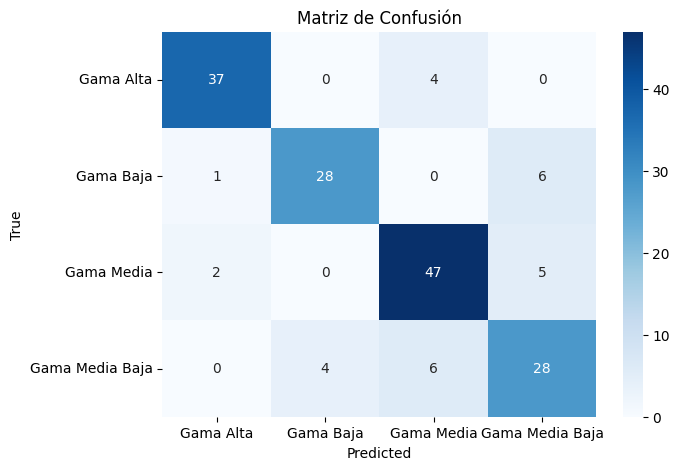

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()


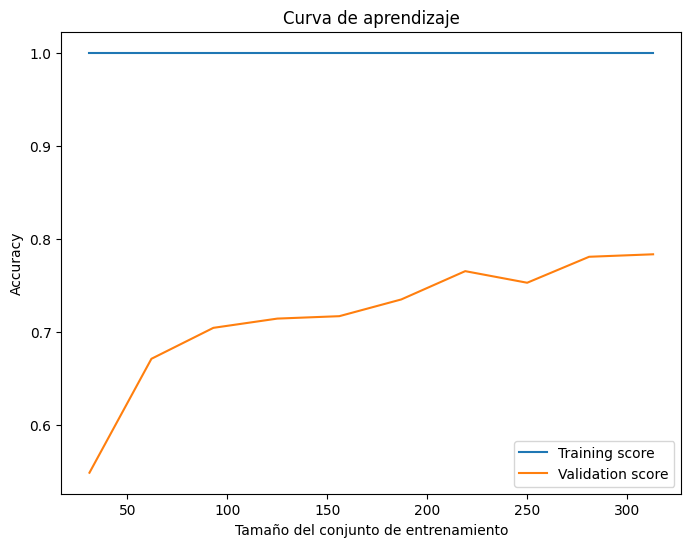

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train,
                                                        cv=5,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        random_state=42)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()


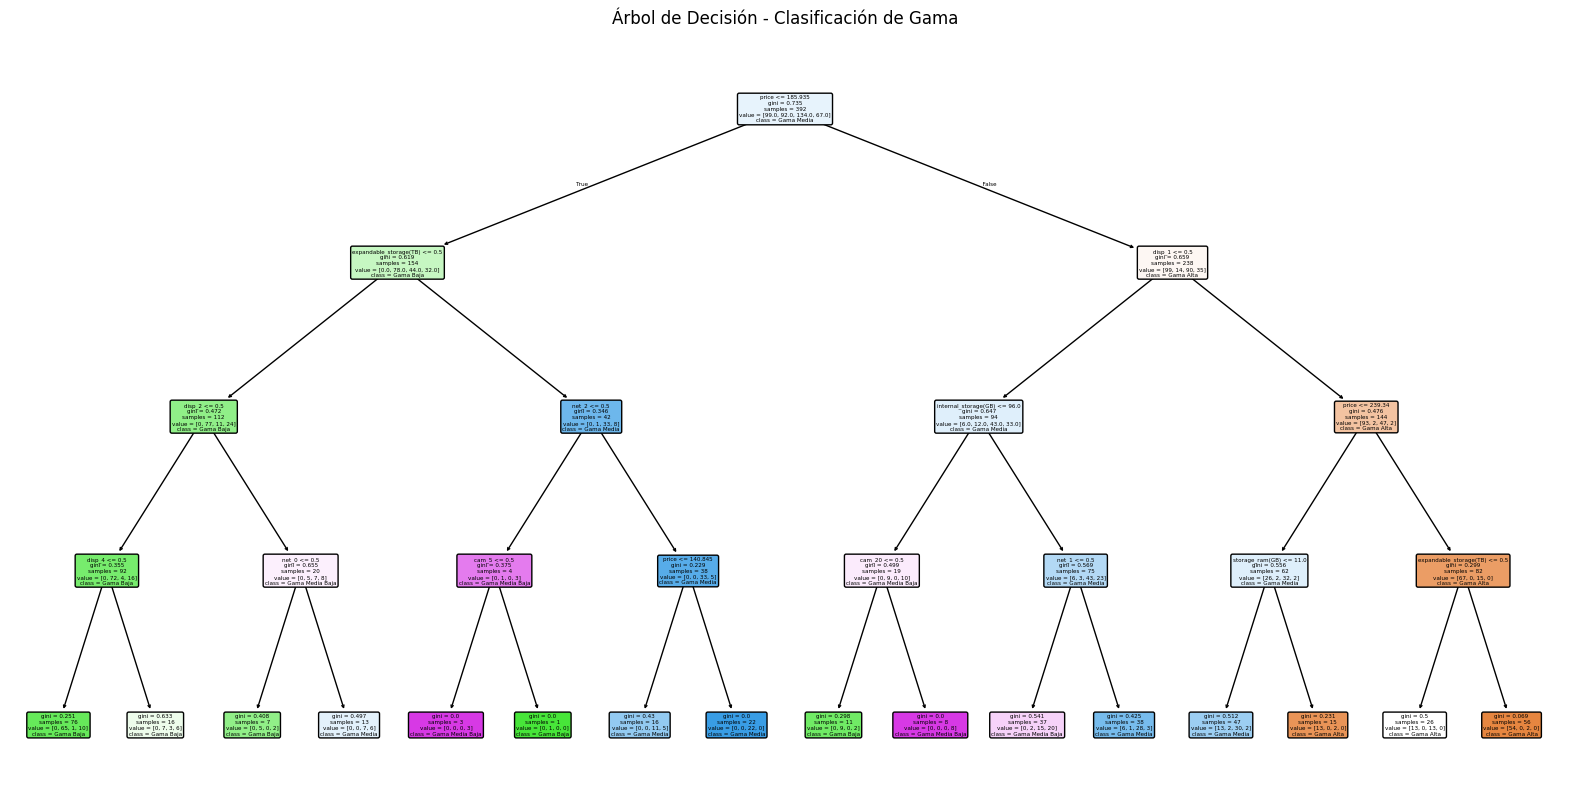

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paso 1: Definir X e y
# Usamos modelo_expandido en lugar de modelo ya que es el DataFrame que tiene las columnas correctas
X = modelo_expandido.drop(columns=['categoria', 'score', 'name'])  # Variables predictoras
y = modelo_expandido['categoria']  # Etiquetas

# Paso 2: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 3: Entrenar modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Puedes cambiar max_depth para ajustar la complejidad
clf.fit(X_train, y_train)

# Paso 4: Visualizar árbol
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión - Clasificación de Gama")
plt.show()

<ipython-input-782-4d9b332580cf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='importance', y='feature', palette='viridis')


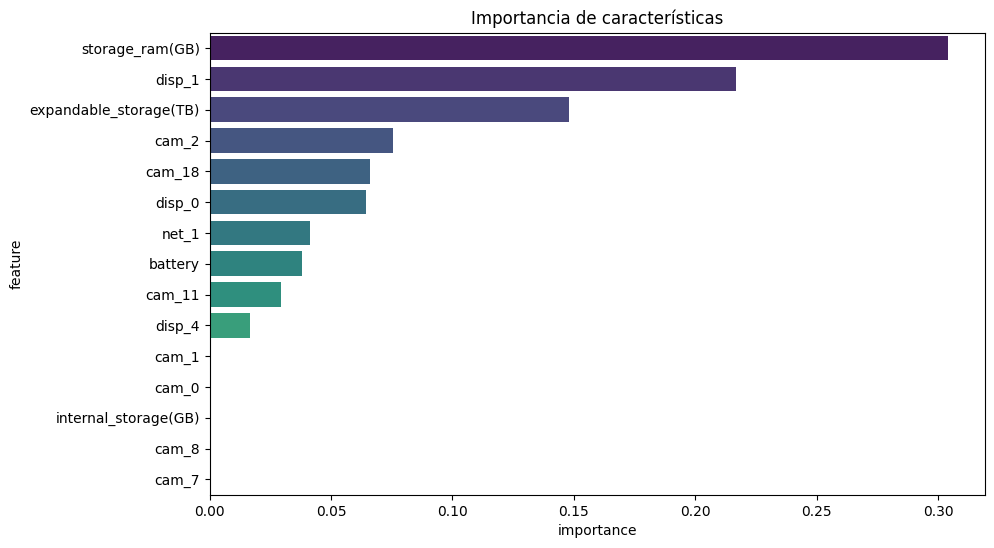

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras, excluyendo variables objetivo y no numéricas
X_features = modelo_expandido.drop(columns=['categoria', 'score', 'ratings', 'name', 'price'])

# Etiqueta
y_cat = modelo_expandido['categoria']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_features, y_cat, test_size=0.3, random_state=42)

# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Importancia
importances = clf.feature_importances_
features = X_features.columns

# Crear DataFrame importancia
df_importance = pd.DataFrame({'feature': features, 'importance': importances})

# Ordenar y mostrar top 15
df_importance = df_importance.sort_values(by='importance', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(data=df_importance, x='importance', y='feature', palette='viridis')
plt.title('Importancia de características')
plt.show()


In [ ]:
import ast
import pandas as pd

# 1. Leer CSV
df_nuevos = pd.read_csv('smartphone_clean.csv')##smartphone_clean-3.csv
df_nuevos


,name,ratings,price,internal_storage(GB),storage_ram(GB),expandable_storage(TB),battery,vector_camaras,vector_display,vector_network
0,NaN,NaN,NaN,256,8,1.0,5000,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1]"
1,NaN,NaN,NaN,64,8,0.0,6000,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 0, 1]"
2,NaN,NaN,NaN,100,12,1.0,4400,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1]"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b3af838-5766-45af-9fd8-5c49cd095a9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>